In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("E://spark/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.drop('Id', axis = 1, inplace =True)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
def size(x, y):
    plt.figure(figsize=(x, y))

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

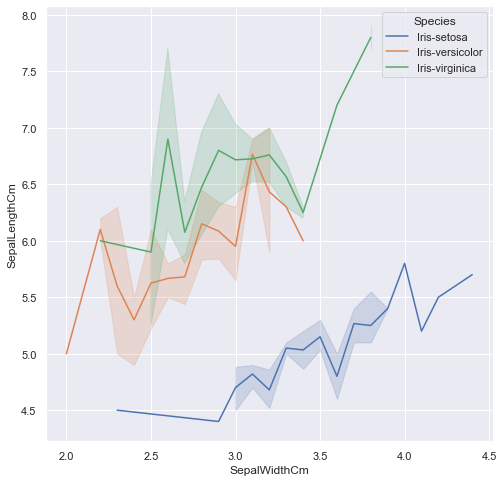

In [10]:
#visualizing the Sepal length and width
size(8, 8)
sns.lineplot(data=df, x= 'SepalWidthCm', y = 'SepalLengthCm', hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

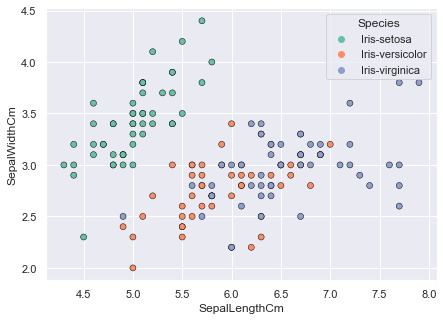

In [11]:
size(7,5)
sns.scatterplot(data = df, y = 'SepalWidthCm', x = 'SepalLengthCm', hue = 'Species',palette='Set2', edgecolor = 'black' )

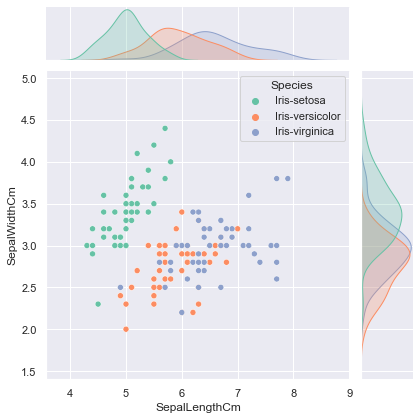

In [12]:
sns.jointplot(x = df.SepalLengthCm, y =df.SepalWidthCm,hue = df.Species , palette= 'Set2')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

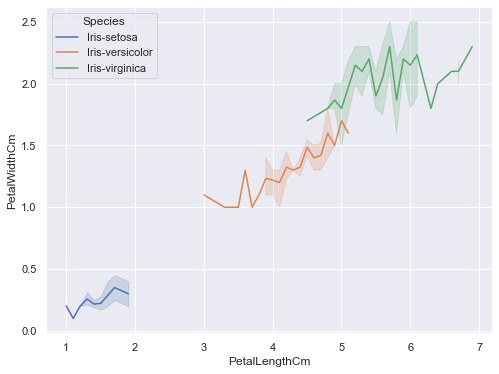

In [13]:
#visualizing petal length and width
size(8,6)
sns.lineplot(data = df, x ='PetalLengthCm', y = 'PetalWidthCm', hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

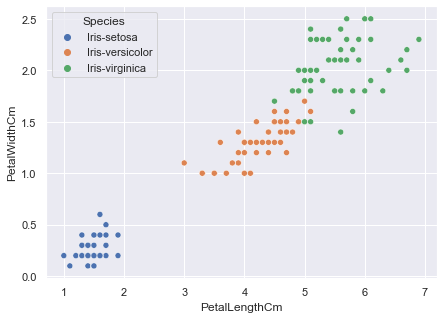

In [14]:
size(7,5)
sns.scatterplot(data = df, x = "PetalLengthCm", y = 'PetalWidthCm', hue= 'Species')

In [15]:
x = df.iloc[:,:-1]
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
b = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    b.append(kmeans.inertia_)


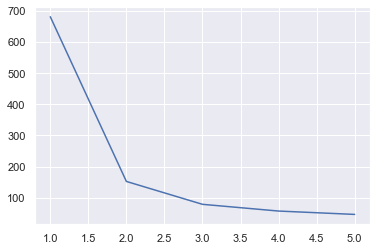

In [18]:
plt.plot(range(1,6), b)

In [19]:
# taking 3 clusters
kmeans = KMeans(n_clusters= 3).fit(X)
labels = kmeans.labels_
labels = list(set(labels))
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
marks = '.X*'
label = ['Iris-virginica','Iris-setosa','Iris-versicolour']


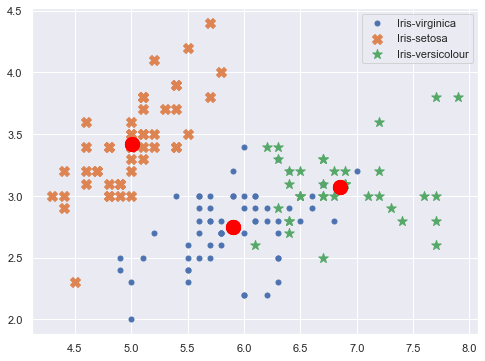

In [21]:
size(8, 6)
for i, markers in zip(range(len(labels)), marks):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans ==i, 1], marker= markers, label = label[i], s = 100)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = 'o', color = 'red',s = 200 )
    plt.legend()
